In [5]:
import YouTube_Data_Wrangling as dw
from matplotlib.gridspec import GridSpec
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import requests
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler

In [6]:
##################
data_df=dw.combined_usa_mx_df
scaler = MinMaxScaler(feature_range=(-2,2))
data_df['views']=scaler.fit_transform(data_df.views.values.reshape(-1,1))
data_df

category=list(data_df['category_name'].unique())
category.remove('Nonprofits & Activism')

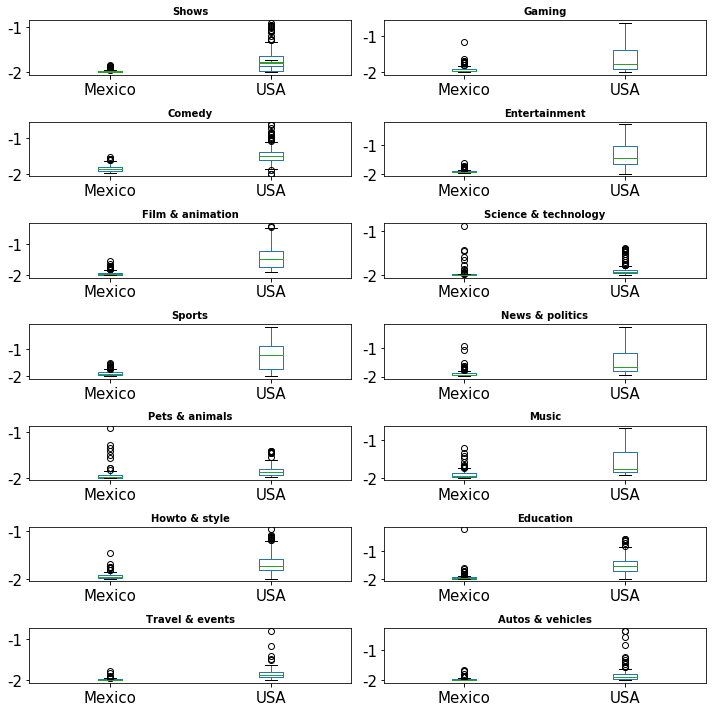

In [7]:
fig, axes = plt.subplots(nrows=int(len(category)/2),ncols=2,figsize=(10,10))
i=0
j=0
for cat in category:
    if i==7:
        i=0
        j=1
    cat_df=data_df[(data_df.category_name==cat)]
    #cat_df['trending_date']=cat_df['trending_date'].dt.year
    cat_df_drop=cat_df.drop_duplicates()
    cat_df.reset_index(drop=True,inplace=True)
    cat_df.groupby(['trending_date','country'])['views'].mean().unstack('country').plot.box(ax=axes[i][j])
    axes[i][j].set_title(str(cat).capitalize(),fontsize=10,weight="bold")
    axes[i][j].xaxis.set_tick_params(labelsize=15, width=0.9)
    axes[i][j].yaxis.set_tick_params(labelsize=15, width=0.9)
    axes[i][j].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),',')))
    plt.tight_layout()

    if j==1:
        j=0
        i=i
        exit
    else:
        j=1
        i=i+1